**import the modules** 

In [0]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = '/content/drive/My Drive/Datasets/chest_xray'
trainingdir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'test')
tnormal = os.path.join(trainingdir,'NORMAL')
tpneumonia = os.path.join(trainingdir,'PNEUMONIA')
vnormal = os.path.join(validation_dir,'NORMAL')
vpneumonia = os.path.join(validation_dir,'PNEUMONIA')

**Defining a CNN model 1 with CONV2D layers**
- 4 convolutions and maxpooling layers
- Rectified Linear activation function in all the layers except for the last one
- 2 Dense layers in FC
- Sigmoid activation function in last layers as we're doing  binary classification
- Optimizer - RMSprop 

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),input_shape = (150,150,3),activation = tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3),activation = tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation = tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation = tf.nn.relu),
                                   tf.keras.layers.Dense(128,activation = tf.nn.relu),
                                   tf.keras.layers.Dense(1,activation =tf.nn.sigmoid)])


model.compile(loss = 'binary_crossentropy',
              optimizer=  RMSprop(lr=0.001),
              metrics = ['acc'])

                                  


In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

**Defining A different CNN model with different architecture**
- Separable CONV2D layers instead of CONV2d
A spatial separable convolution simply divides a kernel into two, smaller kernels. The most common case would be to divide a 3x3 kernel into a 3x1 and 1x3 kernel.
Now, instead of doing one convolution with 9 multiplications, we do two convolutions with 3 multiplications each (6 in total) to achieve the same effect. With less multiplications, computational complexity goes down, and the network is able to run faster.
Added droup out layers to avoid overfitting
- 2 Conv2d layers
- 6 Separable CONV2D layers
- 4 batch normalization
- 4 maxpooling 2D layers
- 3 Dense layers
- rectified linear activation in every layer except for the last one last
- Sigmoid activation in last layer as we are doing binary classification
- Adam optimizer

In [0]:

model2 = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),input_shape = (150,150,3),activation = tf.nn.relu,padding = 'same'),
                              tf.keras.layers.Conv2D(16,(3,3),activation  = tf.nn.relu,padding = 'same'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPooling2D(2,2),
                              

                              tf.keras.layers.SeparableConv2D(32,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.SeparableConv2D(32,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPooling2D(2,2),
                              
                             

                              tf.keras.layers.SeparableConv2D(64,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.SeparableConv2D(64,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPooling2D(2,2),
                              tf.keras.layers.Dropout(rate = 0.2),

                              
                              tf.keras.layers.SeparableConv2D(128,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.SeparableConv2D(128,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPooling2D(2,2),
                              tf.keras.layers.Dropout(rate = 0.2),
                              

                              tf.keras.layers.SeparableConv2D(256,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.SeparableConv2D(256,(3,3),activation =tf.nn.relu,padding = 'same'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.MaxPooling2D(2,2),
                              tf.keras.layers.Dropout(rate = 0.2),

                              tf.keras.layers.Flatten(),

                              tf.keras.layers.Dense(512,activation = tf.nn.relu),
                              tf.keras.layers.Dropout(rate = 0.3),
                              tf.keras.layers.Dense(128,activation = tf.nn.relu),
                              tf.keras.layers.Dropout(rate = 0.4),
                              tf.keras.layers.Dense(64,activation = tf.nn.relu),
                              tf.keras.layers.Dropout(rate = 0.3),
                              

                              tf.keras.layers.Dense(1,activation = tf.nn.sigmoid),
                              
                              ])

model2.compile(loss = 'binary_crossentropy',
               metrics = ['acc'],
               
               optimizer = 'adam')



In [31]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 150, 16)      2320      
_________________________________________________________________
batch_normalization_10 (Batc (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
separable_conv2d_16 (Separab (None, 75, 75, 32)        688       
_________________________________________________________________
separable_conv2d_17 (Separab (None, 75, 75, 32)        1344      
_________________________________________________________________
batch_normalization_11 (Batc (None, 75, 75, 32)       

**Using Image Augmentation**
Augmenting the image for better accuracy and faster training
**Fitting the model 1**


In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 40,
                                    height_shift_range = 0.2,
                                    width_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 40,
                                    height_shift_range = 0.2,
                                    width_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')


train_generator = train_datagen.flow_from_directory(trainingdir,
                                                    target_size = (150,150),
                                                    batch_size =20,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size = (150,150),
                                                    batch_size =20,
                                                    class_mode = 'binary')
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [33]:
history = model.fit_generator(train_generator,
                    epochs = 20,
                    steps_per_epoch = 5126//32,
                    validation_steps = 624//32,
                    validation_data = validation_generator,
                    verbose =1,callbacks = [checkpoint, early])

Epoch 1/20
160/160 [==============================] - 78s 486ms/step - loss: 0.5670 - acc: 0.7419 - val_loss: 0.8952 - val_acc: 0.4211
Epoch 2/20
160/160 [==============================] - 52s 322ms/step - loss: 0.4524 - acc: 0.7735 - val_loss: 0.5587 - val_acc: 0.7368
Epoch 3/20
160/160 [==============================] - 52s 322ms/step - loss: 0.3711 - acc: 0.8248 - val_loss: 0.6352 - val_acc: 0.6921
Epoch 4/20
160/160 [==============================] - 51s 319ms/step - loss: 0.3457 - acc: 0.8498 - val_loss: 1.3654 - val_acc: 0.6921
Epoch 5/20
160/160 [==============================] - 51s 318ms/step - loss: 0.3395 - acc: 0.8569 - val_loss: 0.7064 - val_acc: 0.7316
Epoch 6/20
160/160 [==============================] - 51s 317ms/step - loss: 0.3210 - acc: 0.8670 - val_loss: 0.6372 - val_acc: 0.7237
Epoch 7/20
160/160 [==============================] - 51s 319ms/step - loss: 0.2862 - acc: 0.8772 - val_loss: 0.4539 - val_acc: 0.8026
Epoch 8/20
160/160 [==============================] - 5

**fitting the model2** 

In [34]:
history2 = model2.fit_generator(train_generator,
                    epochs = 20,
                    steps_per_epoch  = 5216//32,
                    validation_steps = 624//32,
                    validation_data = validation_generator,
                    verbose =1,callbacks = [checkpoint, early])

Epoch 1/20
163/163 [==============================] - 59s 363ms/step - loss: 0.3984 - acc: 0.8126 - val_loss: 0.9806 - val_acc: 0.6263
Epoch 2/20
163/163 [==============================] - 56s 341ms/step - loss: 0.3210 - acc: 0.8612 - val_loss: 1.2812 - val_acc: 0.6263
Epoch 3/20
163/163 [==============================] - 55s 337ms/step - loss: 0.3031 - acc: 0.8682 - val_loss: 1.1794 - val_acc: 0.6263
Epoch 4/20
163/163 [==============================] - 56s 341ms/step - loss: 0.2973 - acc: 0.8718 - val_loss: 1.0764 - val_acc: 0.6263
Epoch 5/20
163/163 [==============================] - 55s 338ms/step - loss: 0.2752 - acc: 0.8885 - val_loss: 0.6080 - val_acc: 0.6711
Epoch 6/20
163/163 [==============================] - 55s 340ms/step - loss: 0.2868 - acc: 0.8767 - val_loss: 0.5108 - val_acc: 0.7553
Epoch 7/20
163/163 [==============================] - 55s 335ms/step - loss: 0.2648 - acc: 0.8887 - val_loss: 0.7914 - val_acc: 0.5526
Epoch 8/20
163/163 [==============================] - 5

**Plotting the results (accuracy and validation logs) for the first model**

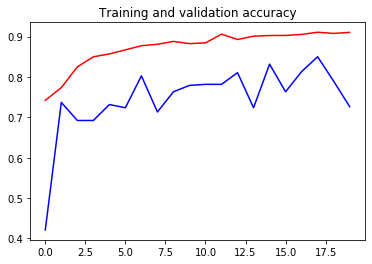

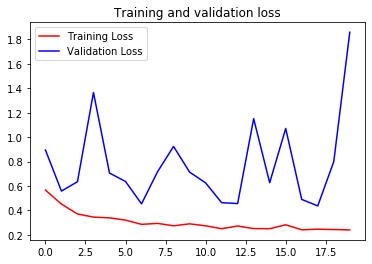

In [35]:
import matplotlib.pyplot as plt

acc =history.history['acc']
val_acc =history.history['val_acc']
loss =history.history['loss']
val_loss =history.history['val_loss']
epooch = range(len(acc))

plt.figure()

plt.plot(epooch, acc, 'b', label='Training accuracy',color = 'red')
plt.plot(epooch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epooch, loss, 'b', label='Training Loss',color = 'red')
plt.plot(epooch, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Plotting the results (training and validation loss) for the second model**

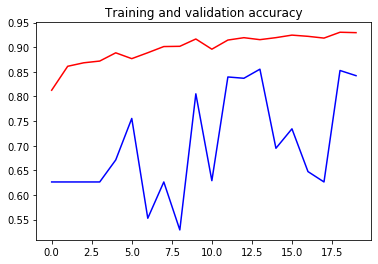

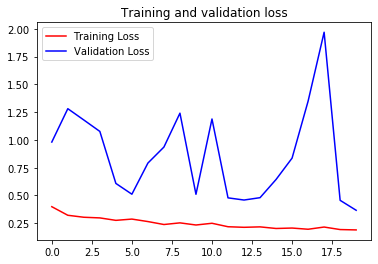

In [36]:
import matplotlib.pyplot as plt

acc =history2.history['acc']
val_acc =history2.history['val_acc']
loss =history2.history['loss']
val_loss =history2.history['val_loss']
epooch = range(len(acc))

plt.figure()

plt.plot(epooch, acc, 'b', label='Training accuracy',color = 'red')
plt.plot(epooch, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epooch, loss, 'b', label='Training Loss',color = 'red')
plt.plot(epooch, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()